# Check $B^0 \to D^{*-} \pi^+ \pi^- e^+ \nu$

In [1]:
var = 'Dst_constr_B0_M'
low = 5150.
high = 5545.

## Import

In [2]:
from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets
import pandas as pd


import sys
sys.path.append(loc.SCRIPTS)
from load_save_data import load_data, add_constr_Dst
import plot.histogram as h
from plot.tool import save_file

Welcome to JupyROOT 6.22/02


## Load

In [3]:
variables = []

for particle in 'B0', 'Dst':
    variables.append(f"{particle}_M")

variables.append('tau_pion0_ProbNNe')
variables.append('tau_pion1_ProbNNe')
variables.append('tau_pion2_ProbNNe')
variables.append('tau_pion0_ID')
variables.append('tau_pion1_ID')
variables.append('tau_pion2_ID')
variables.append('Dst_ID')

In [4]:
df = load_data(years,magnets,type_data = 'common'  ,vars=variables, cut_DeltaM=True)

/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//common/data/data_90000000_2015_up.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//common/data/data_90000000_2015_down.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//common/data/data_90000000_2016_up.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//common/data/data_90000000_2016_down.root
cut on DeltaM has removed 425088 over 935261 events


In [5]:
df = add_constr_Dst(df)

## ID variable

In [6]:
print(all(df['tau_pion0_ID'] == -df['Dst_ID']/413*211))
print(all(df['tau_pion1_ID'] == df['Dst_ID']/413*211))
print(all(df['tau_pion2_ID'] == -df['Dst_ID']/413*211))

True
True
True


- `tau_pion1_ID`: same charge as $D^*$
- `tau_pion0_ID`: opposite charge to $D^*$
- `tau_pion2_ID`: opposite charge to $D^*$

If $D^{*-}$:
- `tau_pion1_ID`: $\pi^-$
- `tau_pion0_ID`: $\pi^+$
- `tau_pion2_ID`: $\pi^+$

### `ProbNNmu` plots

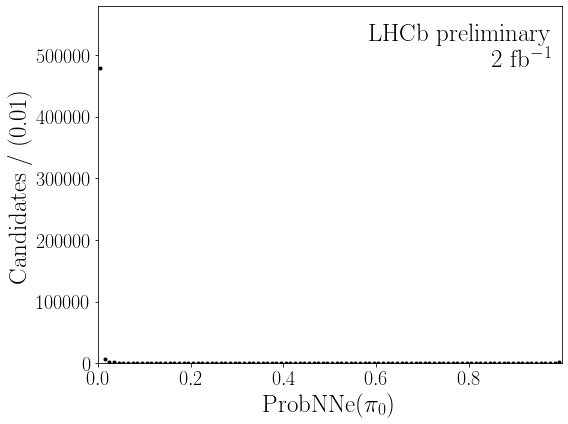

In [7]:
fig, ax = h.plot_hist_particle({'common':df}, 'tau_pion0_ProbNNe', pos_text_LHC='right',
              n_bins = 100, mode_hist = False, colors='black', save_fig=False)

In [9]:
df['tau_pion0_ProbNNe']

0         0.003644
1         0.000020
2         0.000003
3         0.000002
4         0.000935
            ...   
510168    0.000002
510169    0.014822
510170    0.001551
510171    0.000019
510172    0.000005
Name: tau_pion0_ProbNNe, Length: 510173, dtype: float64

## Cut to get $B^0 \to D^{*-} \pi^+ \pi^- \mu^+ \nu$

In [13]:
df_cut_bkg = df.query('tau_pion0_ProbNNe > 0.4 or tau_pion2_ProbNNe > 0.4')
df_cut_bkg_plus = df_cut_bkg.query('not(tau_pion0_ProbNNe < 0.4 and tau_pion2_ProbNNe < 0.4)')

In [14]:
print(f"Efficiency of the cut: {1 - len(df_cut_bkg)/len(df)}")
print(f"Efficiency of the second cut: {1 - len(df_cut_bkg_plus)/len(df_cut_bkg)}")

Efficiency of the cut: 0.953641215822868
Efficiency of the second cut: 0.0


In [18]:
all(df_cut_bkg['tau_pion2_ProbNNe']!=df_cut_bkg['tau_pion0_ProbNNe'])

True

In [20]:
df_cut_bkg['tau_pion0_ProbNNe']

26        0.998477
29        0.839257
44        0.948773
64        0.969774
69        0.993813
            ...   
510082    0.640556
510088    0.000262
510115    0.489678
510148    0.540972
510157    0.000002
Name: tau_pion0_ProbNNe, Length: 23651, dtype: float64

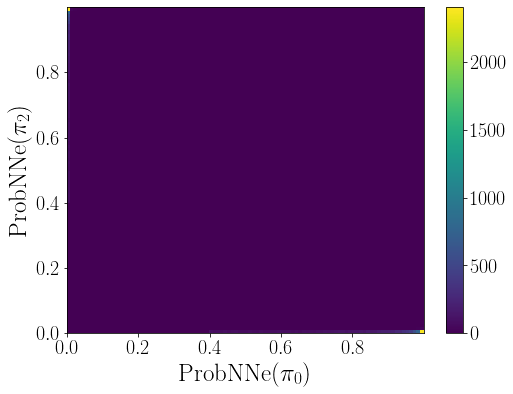

In [21]:
fig, ax = h.plot_hist2d_particle(df_cut_bkg, ['tau_pion0_ProbNNe', 'tau_pion2_ProbNNe'],
                                 save_fig=False)

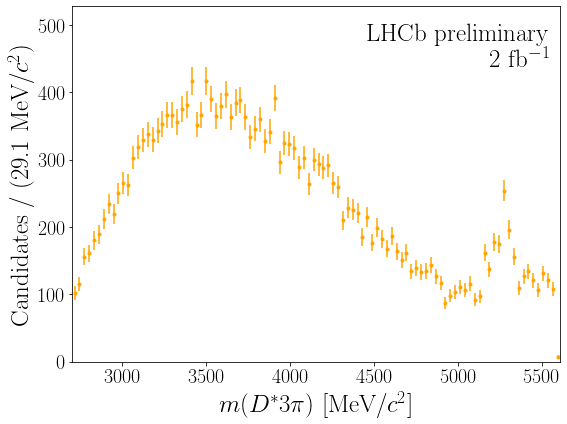

In [22]:
fig, ax = h.plot_hist_particle({'$B^0 \\to D^{*-} \\pi^+ \\pi^- \\e^+ \\nu$':df_cut_bkg}, 'B0_M', pos_text_LHC='right',
              n_bins = 100, mode_hist = False, colors='orange', save_fig=False)

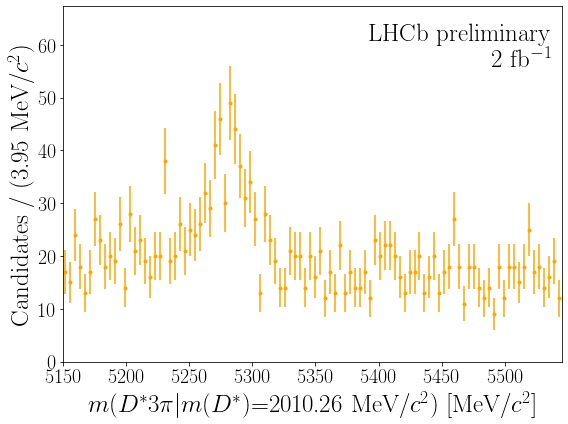

In [23]:
fig, ax = h.plot_hist_particle({'$B^0 \\to D^{*-} \\pi^+ \\pi^- \\e^+ \\nu$':df_cut_bkg}, var, pos_text_LHC='right',
              n_bins = 100, mode_hist = False, colors='orange', save_fig=False, 
                              low=low, high=high)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


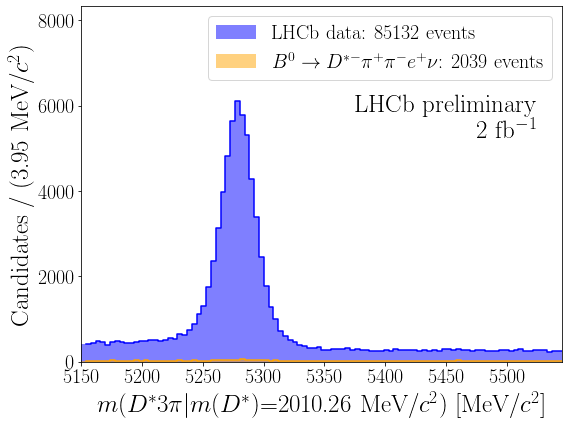

In [24]:
fig, ax = h.plot_hist_particle({'LHCb data':df, '$B^0 \\to D^{*-} \\pi^+ \\pi^- e^+ \\nu$':df_cut_bkg}, 
                               var, pos_text_LHC=[0.95, 0.75, 'right'],
                               n_bins = 100, mode_hist=True, colors=['blue', 'orange'], save_fig=False, 
                               low=low, high=high, density=False)

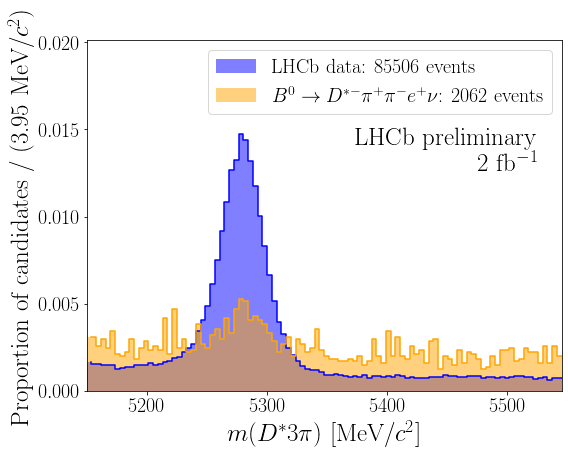

In [27]:
fig, ax = h.plot_hist_particle({'LHCb data':df, '$B^0 \\to D^{*-} \\pi^+ \\pi^- e^+ \\nu$':df_cut_bkg}, 
                               'B0_M', pos_text_LHC=[0.95, 0.75, 'right'],
                               n_bins = 100, mode_hist=True, colors=['blue', 'orange'], save_fig=False, 
                               low=low, high=high, density=True)

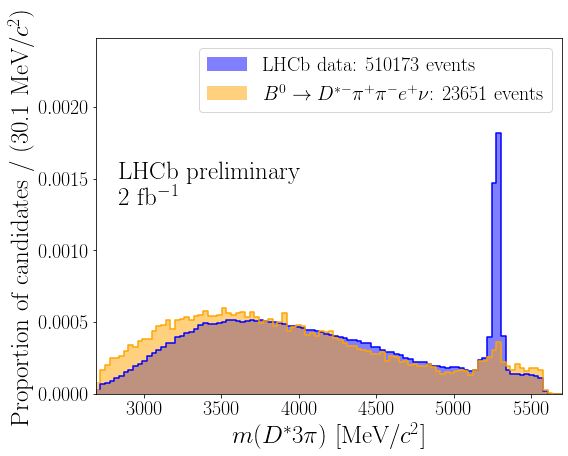

In [28]:
fig, ax = h.plot_hist_particle({'LHCb data':df, '$B^0 \\to D^{*-} \\pi^+ \\pi^- e^+ \\nu$':df_cut_bkg}, 
                               'B0_M', pos_text_LHC=[0.05, 0.65, 'left'],
                               n_bins = 100, mode_hist=True, colors=['blue', 'orange'], save_fig=False, 
                               density=True)